In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("rideshare_kaggle.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134455 entries, 0 to 134454
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           134455 non-null  object 
 1   timestamp                    134455 non-null  float64
 2   hour                         134455 non-null  int64  
 3   day                          134455 non-null  int64  
 4   month                        134455 non-null  int64  
 5   datetime                     134455 non-null  object 
 6   timezone                     134455 non-null  object 
 7   source                       134455 non-null  object 
 8   destination                  134455 non-null  object 
 9   cab_type                     134455 non-null  object 
 10  product_id                   134455 non-null  object 
 11  name                         134455 non-null  object 
 12  price                        123773 non-null  float64
 13 

<Axes: >

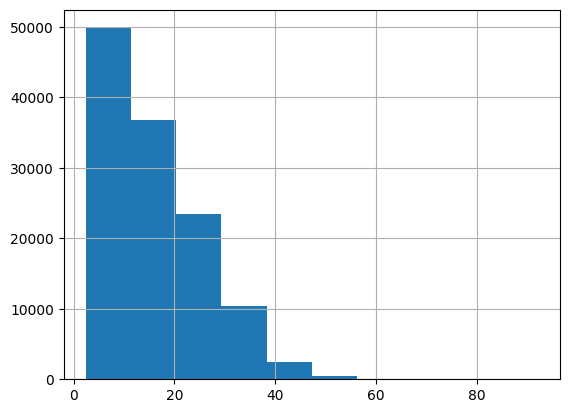

In [3]:
df.price.hist()

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1.544980e+09,39.89,1.545012e+09,43.68,1.544969e+09,33.73,1.545012e+09,38.07,1.544958e+09
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1.543252e+09,40.49,1.543234e+09,47.30,1.543252e+09,36.20,1.543291e+09,43.92,1.543252e+09
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1.543338e+09,35.36,1.543378e+09,47.55,1.543320e+09,31.04,1.543378e+09,44.12,1.543320e+09
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1.543507e+09,34.67,1.543550e+09,45.03,1.543511e+09,30.30,1.543550e+09,38.53,1.543511e+09
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1.543421e+09,33.10,1.543403e+09,42.18,1.543421e+09,29.11,1.543392e+09,35.75,1.543421e+09


In [5]:
#number of distinct values in 'timezone' column

print(len(pd.unique(df['timezone'])))

1


In [6]:
df = df.drop(columns = ['id','timezone', 'datetime','timestamp', 
                        'temperatureHigh','temperatureHighTime', 'temperatureLow',
                        'temperatureLowTime', 'apparentTemperatureHigh', 'temperatureMin',
                        'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
                        'apparentTemperatureHighTime', 'apparentTemperatureLow',
                        'apparentTemperatureLowTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime',
                        'apparentTemperatureMax', 'apparentTemperatureMaxTime','visibility.1',
                        'precipIntensityMax', 'uvIndexTime'])

In [7]:
df.isna().sum()

hour                       0
day                        0
month                      0
source                     0
destination                0
cab_type                   0
product_id                 0
name                       0
price                  10682
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
windGustTime               0
visibility                 0
icon                       1
dewPoint                   1
pressure                   1
windBearing                1
cloudCover                 1
uvIndex                    1
ozone                      1
sunriseTime                1
sunsetTime                 1
moonPhase                  1
dtype: int64

In [8]:
df['price'] = df['price'].fillna(df['price'].median())

In [9]:
df.isna().sum()

hour                   0
day                    0
month                  0
source                 0
destination            0
cab_type               0
product_id             0
name                   0
price                  0
distance               0
surge_multiplier       0
latitude               0
longitude              0
temperature            0
apparentTemperature    0
short_summary          0
long_summary           0
precipIntensity        0
precipProbability      0
humidity               0
windSpeed              0
windGust               0
windGustTime           0
visibility             0
icon                   1
dewPoint               1
pressure               1
windBearing            1
cloudCover             1
uvIndex                1
ozone                  1
sunriseTime            1
sunsetTime             1
moonPhase              1
dtype: int64

In [10]:
df.corr()['price']

<ipython-input-10-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


hour                   0.000084
day                   -0.002031
month                  0.001197
price                  1.000000
distance               0.329165
surge_multiplier       0.246834
latitude               0.004503
longitude             -0.005416
temperature            0.000331
apparentTemperature   -0.000153
precipIntensity       -0.000186
precipProbability     -0.000761
humidity               0.002805
windSpeed              0.002515
windGust               0.003286
windGustTime          -0.000403
visibility            -0.000288
dewPoint               0.001886
pressure              -0.002056
windBearing            0.004844
cloudCover             0.003547
uvIndex               -0.000215
ozone                  0.000334
sunriseTime           -0.000353
sunsetTime            -0.000353
moonPhase              0.001543
Name: price, dtype: float64

Price has a strong positive correlation with distance and surge_multiplier. There is a very weak correlation with precipIntesity so I will drop that column. Latitude and longitude might be redundent columns since we have source and destination columns. Since we have the icon column that gives us a good description of the weather and time-of-day, I think we can drop the weather, and time/day columns. Product_id is also an irrelavant column I can drop.

In [11]:
df = df.drop(columns = ['product_id','hour','day','month','precipIntensity','precipProbability', 'windGust','windSpeed','windGustTime','ozone', 'uvIndex','dewPoint', 'pressure', 'ozone',
                        'cloudCover', 'windBearing','sunriseTime', 'sunsetTime','apparentTemperature', 'moonPhase', 'visibility','latitude', 'longitude', 'humidity', 'temperature',
                        'short_summary','long_summary'])

In [12]:
df.columns

Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'icon'],
      dtype='object')

In [13]:
df.columns

Index(['source', 'destination', 'cab_type', 'name', 'price', 'distance',
       'surge_multiplier', 'icon'],
      dtype='object')

In [14]:
df['source'].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [15]:
df['destination'].unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

In [16]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [17]:
df['icon'].unique()

array([' partly-cloudy-night ', ' rain ', ' clear-night ', ' cloudy ',
       ' fog ', ' clear-day ', ' partly-cloudy-day ', nan], dtype=object)

In [18]:
df.head()

,source,destination,cab_type,name,price,distance,surge_multiplier,icon
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,partly-cloudy-night


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


linreg = LinearRegression()

X = df.drop('price', axis = 'columns')
y = df['price']

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                       remainder = 'passthrough')




In [20]:
X_base = column_trans.fit_transform(X)

In [21]:
X_base

<134455x49 sparse matrix of type '<class 'numpy.float64'>'
	with 941185 stored elements in Compressed Sparse Row format>

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X_base, y, test_size=0.33)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):

  y_predict = model.predict(X_train)
  print("train mse: ", mean_squared_error(y_predict, y_train))

  y_predict = model.predict(X_test)
  print("test mse: ", mean_squared_error(y_predict, y_test))

  print("test r2_score: ", r2_score(y_predict, y_test))





the best estimator was ridge(alpha = 1e-15), LinearSVR(loss='squared_epsilon_insensitive'), tree.DecisionTreeRegressor(max_depth=14, min_samples_leaf=10)

In [24]:
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn import tree

#baseline linear regreesion

#model = Ridge(alpha = 1e-15)
#hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
#ridgeRegressor = GridSearchCV(model, hyperParameters, scoring='neg_mean_squared_error', cv=5)
#ridgeRegressor.fit(X_train, y_train)
#ridgeRegressor.best_estimator_
#model.fit(X_train, y_train)
#evaluate_model(model)

#baseline svm
#model = LinearSVR(loss='squared_epsilon_insensitive')
#model.fit(X_train, y_train)
#evaluate_model(model)
#parameters = { "loss": ["epsilon_insensitive", "squared_epsilon_insensitive"]}
#search = GridSearchCV(model, parameters)

#search.fit(X_train, y_train)
#search.best_estimator_

#baseline decision trees
model = tree.DecisionTreeRegressor(max_depth=11, min_samples_leaf=10)
#hyperParameters = {'min_samples_leaf':[2,4,6,8,10],'min_samples_split':[2,3,4,5,6,7,8],'max_depth':[2,4,6,8,10,12,14]}
#search = GridSearchCV(model, hyperParameters, scoring='neg_mean_squared_error', cv=5)
#search.fit(X_train, y_train)
#search.best_estimator_
model.fit(X_train, y_train)
evaluate_model(model)


train mse:  3.2803540468122057
test mse:  3.225799927156943
test r2_score:  0.9589358735660316


In [25]:
#Experiment 1
import copy

def experiment_1(df, i):
  df_copy = copy.deepcopy(df)

  for i in range(2, i+1):

    df_copy[str(i)] = df_copy['distance']+i
    df_copy[str(i)+'_'+str(i-1)] = df_copy['distance']*i
    df_copy[str(i)+'_'+str(i-2)] = df_copy['distance'].pow(i)

    df_copy['surge'+ str(i)] = df_copy['surge_multiplier']+i
    df_copy['surge'+str(i)+'_'+str(i-1)] = df_copy['surge_multiplier']*i
    df_copy['surge'+ str(i)+'_'+str(i-2)] = df_copy['surge_multiplier'].pow(i)

  df_copy = df_copy.drop(columns = ['distance', 'surge_multiplier'])

  return df_copy




In [26]:
X_1 = experiment_1(X, 5)
X_1 = column_trans.fit_transform(X_1)

X_train, X_test, y_train, y_test = train_test_split( X_1, y, test_size=0.33)

#baseline linear regreesion
model = tree.DecisionTreeRegressor(max_depth=14, min_samples_leaf=10)
model.fit(X_train, y_train)
evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)


train mse:  2.619929928018338
test mse:  2.8709743108700088
test r2_score:  0.9635225413375691


In [27]:
#Experiment 2
from sklearn.preprocessing import PolynomialFeatures

column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                       (PolynomialFeatures(2), ['distance', 'surge_multiplier']))

X_2 = column_trans.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_2, y, test_size=0.33)

model = tree.DecisionTreeRegressor(max_depth=14, min_samples_leaf=10)
model.fit(X_train, y_train)
evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)


train mse:  2.5599522204185456
test mse:  2.9061766875125223
test r2_score:  0.9630176236755839


In [28]:
#Experiment 3
from sklearn.decomposition import PCA

column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                       (PCA(n_components = .95), ['distance', 'surge_multiplier']))

X_3 = column_trans.fit_transform(X)
#pca = PCA(n_components = .95)

#pca.fit_transform(X_3)

X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.33)
model = tree.DecisionTreeRegressor(max_depth=14, min_samples_leaf=10)
model.fit(X_train, y_train)
evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)



train mse:  5.517372371485677
test mse:  6.065180538463113
test r2_score:  0.920259731129689


In [29]:
#Experiment 4
from sklearn.preprocessing import StandardScaler

column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                       (StandardScaler(), ['distance', 'surge_multiplier']))

X_4 = column_trans.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_4, y, test_size=0.33)

model = LinearSVR(loss='squared_epsilon_insensitive')
model.fit(X_train, y_train)
evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)



train mse:  6.634806006787007
test mse:  6.505479490720507
test r2_score:  0.9135630846196383


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [37]:
#Experiment 5
import random
#import numpy.random as random
from matplotlib import pyplot

X_5 = copy.deepcopy(X)

X_5['Random'] = [random.uniform(100,200) for _ in range(len(X))]
X_5['Disc_Random'] = [random.randrange(100,200,50) for _ in range(len(X))]

column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                        (StandardScaler(), ['distance', 'surge_multiplier']))

X_5_trans = column_trans.fit_transform(X_5)

X_train, X_test, y_train, y_test = train_test_split(X_5_trans, y, test_size=0.33)

model = LinearSVR(loss='squared_epsilon_insensitive')
model.fit(X_train, y_train)
evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)

# importance = model.feature_importances_
# print(len(importance))
# for i,v in enumerate(importance):
#   print("Feature: %s, Score: %.5f" % (df.columns[i], v))

# dummy = [x for x in range(len(importance))]
# pyplot.bar(dummy, importance)
# #plt.xticks(dummy, features)
# plt.xticks(rotation = 90, ha = 'right')
# pyplot.show()

#evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)



train mse:  6.5728419445752
test mse:  6.629927373659976
test r2_score:  0.9117467398654268


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [60]:
X_5_trans.toarray()[20]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.72      ,   1.        ,
       123.76118176])

In [ ]:
features = ['distance', 'surge multiplier', 'random']

In [58]:
X_5.head()

,source,destination,cab_type,name,distance,surge_multiplier,icon,Random
0,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,partly-cloudy-night,191.804421
1,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,rain,193.303216
2,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,clear-night,182.210815
3,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,clear-night,183.820326
4,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,partly-cloudy-night,138.848030


In [59]:
print(importance)

[2.11167965e-04 3.06165458e-04 1.06679741e-04 2.99966320e-05
 1.00190368e-04 4.35635351e-05 3.09470358e-04 8.06063745e-05
 1.17806752e-04 1.32884675e-04 6.66149649e-05 8.63091696e-05
 3.69004099e-04 1.67337766e-04 3.34351022e-05 9.29194003e-05
 8.77844462e-05 4.49272933e-06 2.92000959e-05 7.87909233e-05
 4.07206469e-05 2.01331295e-04 7.53248512e-05 6.68726100e-05
 4.98469171e-05 2.17816211e-05 6.62450524e-02 2.48224382e-01
 3.97287590e-02 9.59860008e-02 2.74494111e-01 0.00000000e+00
 2.54229126e-02 2.75675083e-02 1.00000039e-02 7.33234982e-04
 0.00000000e+00 2.13551248e-02 0.00000000e+00 0.00000000e+00
 6.48749919e-06 1.57781372e-04 1.07685921e-06 7.00415624e-05
 1.12182968e-04 2.74593766e-05 1.45751292e-01 3.97901086e-02
 1.41618201e-03]


In [20]:
#Making Pipeline for best performing model (in my opinion)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



column_trans = make_column_transformer((OneHotEncoder(), ['source', 'destination','cab_type','name','icon']),
                                       (StandardScaler(), ['distance', 'surge_multiplier']),
                                       (PolynomialFeatures(2), ['distance', 'surge_multiplier']))

#column_trans.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

pipe = make_pipeline(column_trans, Ridge(alpha = 1e-15))

pipe.fit(X_train, y_train)


#evaluate_model(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['source', 'destination',
                                                   'cab_type', 'name',
                                                   'icon']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['distance',
                                                   'surge_multiplier']),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(),
                                                  ['distance',
                                                   'surge_multiplier'])])),
                ('ridge', Ridge(alpha=1e-15))])